In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

file_path = '/Users/mohanavenkataphaneendrareddyalla/Downloads/Patient_Cancer_SVM.csv'  
data = pd.read_csv(file_path)
data_cleaned = data.drop(columns=['User ID'])
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])

X = data_cleaned.drop(columns=['Diagnosed'])
y = data_cleaned['Diagnosed']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)


y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

def compute_metrics(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()

    TPR = TP / (TP + FN)  # True Positive Rate
    TNR = TN / (TN + FP)  # True Negative Rate
    PPV = TP / (TP + FP)  # Positive Predictive Value
    NPV = TN / (TN + FN)  # Negative Predictive Value
    FNR = FN / (TP + FN)  # False Negative Rate
    FPR = FP / (FP + TN)  # False Positive Rate
    FDR = FP / (TP + FP)  # False Discovery Rate
    FOR = FN / (TN + FN)  # False Omission Rate
    ACC = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    BA = (TPR + TNR) / 2  # Balanced Accuracy
    F1 = 2 * (PPV * TPR) / (PPV + TPR)  # F1-Score
    MCC = ((TP * TN) - (FP * FN)) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))  # Matthews Correlation
    FM = np.sqrt(PPV * TPR)  # Fowlkes-Mallows Index
    BM = TPR + TNR - 1  # Bookmaker Informedness
    MK = PPV + NPV - 1  # Markedness
    prevalence = (TP + FN) / (TP + TN + FP + FN)
    PT = np.sqrt(FPR / TPR) if TPR > 0 else np.nan  
    TS = TP / (TP + FN + FP)  # Threat Score

    return {
        "TPR": TPR, "TNR": TNR, "PPV": PPV, "NPV": NPV,
        "FNR": FNR, "FPR": FPR, "FDR": FDR, "FOR": FOR,
        "ACC": ACC, "BA": BA, "F1": F1, "MCC": MCC,
        "FM": FM, "BM": BM, "MK": MK, "PT": PT, "TS": TS
    }


train_metrics = compute_metrics(conf_matrix_train)
test_metrics = compute_metrics(conf_matrix_test)


print("Training Metrics:", train_metrics)
print("Testing Metrics:", test_metrics)


Training Metrics: {'TPR': 0.9, 'TNR': 0.9166666666666666, 'PPV': 0.8571428571428571, 'NPV': 0.9428571428571428, 'FNR': 0.1, 'FPR': 0.08333333333333333, 'FDR': 0.14285714285714285, 'FOR': 0.05714285714285714, 'ACC': 0.9107142857142857, 'BA': 0.9083333333333333, 'F1': 0.8780487804878048, 'MCC': 0.8082903768654761, 'FM': 0.8783100656536799, 'BM': 0.8166666666666667, 'MK': 0.7999999999999998, 'PT': 0.3042903097250923, 'TS': 0.782608695652174}
Testing Metrics: {'TPR': 0.9069767441860465, 'TNR': 0.9090909090909091, 'PPV': 0.8478260869565217, 'NPV': 0.9459459459459459, 'FNR': 0.09302325581395349, 'FPR': 0.09090909090909091, 'FDR': 0.15217391304347827, 'FOR': 0.05405405405405406, 'ACC': 0.9083333333333333, 'BA': 0.9080338266384778, 'F1': 0.8764044943820224, 'MCC': 0.8048426430847183, 'FM': 0.8769028133059114, 'BM': 0.8160676532769555, 'MK': 0.7937720329024676, 'PT': 0.3165961153158709, 'TS': 0.78}


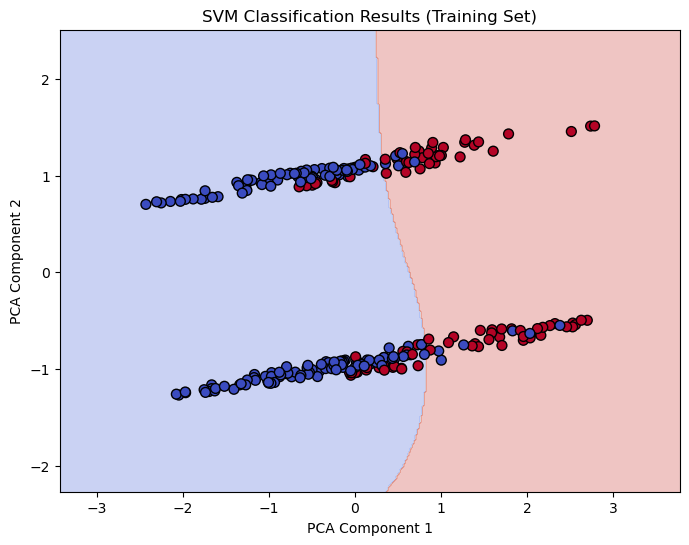

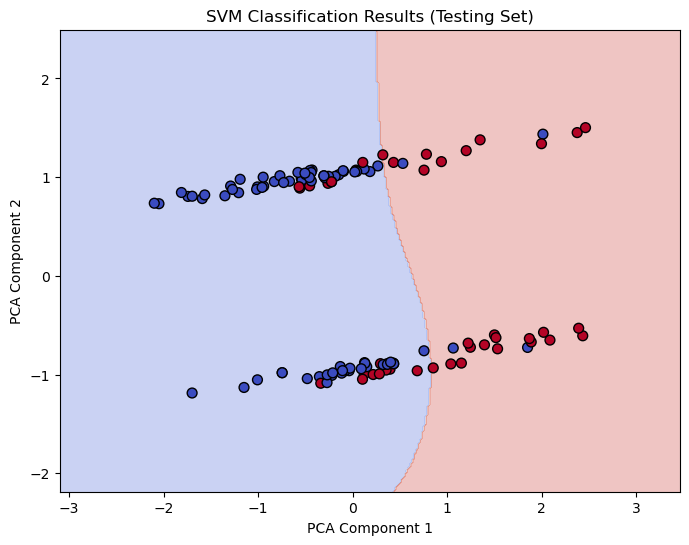

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
svm_rbf.fit(X_train_pca, y_train)

def plot_decision_boundaries(X, y, model, title):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=50, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

plot_decision_boundaries(X_train_pca, y_train, svm_rbf, "SVM Classification Results (Training Set)")

plot_decision_boundaries(X_test_pca, y_test, svm_rbf, "SVM Classification Results (Testing Set)")


### The decision boundary plots illustrate the SVM model's ability to classify the data effectively. 

- ## Training Set:
- The model separates the two classes with minimal overlap, showing it has learned the patterns in the data well. Misclassifications, if any, are near the boundary, indicating strong performance without overfitting.  
- ## Testing Set:
- The decision boundary generalizes well to unseen data, with only a few misclassified points. This demonstrates the model's robustness and reliability.

Overall, the SVM model with an RBF kernel performs well, with good separation of classes and consistent behavior across training and testing sets. Reducing misclassifications could further enhance its performance.